In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4

stafile = 'Z:/roms/Apps/OB500_fennelP/NL09/ob500_sta.nc'

nc = netCDF4.Dataset(stafile, 'r')
nc.variables.keys()

[u'ntimes',
 u'ndtfast',
 u'dt',
 u'dtfast',
 u'dstart',
 u'nHIS',
 u'ndefHIS',
 u'nRST',
 u'ntsAVG',
 u'nAVG',
 u'ndefAVG',
 u'ntsDIA',
 u'nDIA',
 u'ndefDIA',
 u'nSTA',
 u'Falpha',
 u'Fbeta',
 u'Fgamma',
 u'nl_tnu2',
 u'nl_visc4',
 u'LuvSponge',
 u'LtracerSponge',
 u'Akt_bak',
 u'Akv_bak',
 u'Akk_bak',
 u'Akp_bak',
 u'rdrg',
 u'rdrg2',
 u'Zob',
 u'Zos',
 u'Znudg',
 u'M2nudg',
 u'M3nudg',
 u'Tnudg',
 u'rho0',
 u'gamma2',
 u'LuvSrc',
 u'LwSrc',
 u'LtracerSrc',
 u'LsshCLM',
 u'Lm2CLM',
 u'Lm3CLM',
 u'LtracerCLM',
 u'LnudgeM2CLM',
 u'LnudgeM3CLM',
 u'LnudgeTCLM',
 u'K_PO4',
 u'PhyPN',
 u'ZooPN',
 u'LDeRRP',
 u'SDeRRP',
 u'H2SOR',
 u'K_DO',
 u'K_Nitri',
 u'thNitriR',
 u'g_max',
 u't_opt',
 u'I_opt',
 u'beta1',
 u'beta2',
 u'DenitR',
 u'K_Denit',
 u'thDenitR',
 u'thPhyMR',
 u'thRRN',
 u'BioIter',
 u'AttSW',
 u'AttChl',
 u'PARfrac',
 u'Vp0',
 u'I_thNH4',
 u'D_p5NH4',
 u'NitriR',
 u'K_NO3',
 u'K_NH4',
 u'K_Phy',
 u'Chl2C_m',
 u'ChlMin',
 u'PhyCN',
 u'PhyIP',
 u'PhyIS',
 u'PhyMin',
 u'PhyMR',


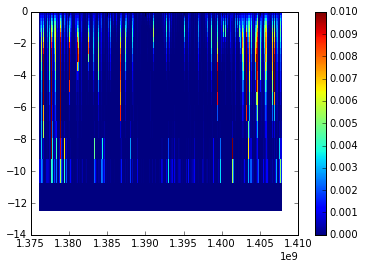

In [38]:
import romspy
import numpy as np

def vpcolor_w(vname, station):
    var = nc.variables[vname]
    time = nc.variables['ocean_time'][:]
    cs_w = nc.variables['Cs_w'][:]
    h = nc.variables['h'][station]
    depth = cs_w[:] * h
    plt.pcolor(time, depth, akv[:,station-1,:].T, vmax=0.01)
    plt.colorbar()

vpcolor_w('AKv', 12)

In [39]:
def vpcolor_r(vname, station):
    var = nc.variables[vname]
    time = nc.variables['ocean_time'][:]
    cs_r = nc.variables['Cs_r'][:]
    h = nc.variables['h'][station]
    depth = cs_r[:] * h
    plt.pcolor(time, depth, akv[:,station-1,:].T, vmax=0.01)
    plt.colorbar()

vpcolor_r('AKt', 12)

KeyError: 'AKt'

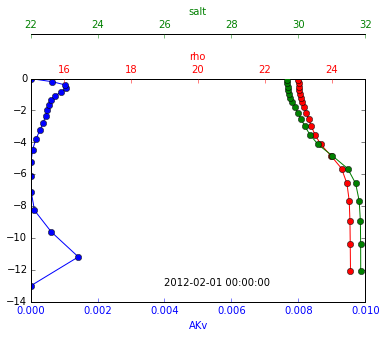

In [103]:
from datetime import datetime

def vplot(date, station):
    time = netCDF4.date2num(date, romspy.JST)
    mod_time = nc.variables['ocean_time'][:]
    t = np.where(mod_time==time)[0]
    akv = nc.variables['AKv'][t,station-1,:][0]
    rho = nc.variables['rho'][t,station-1,:][0]
    temp = nc.variables['temp'][t,station-1,:][0]
    salt = nc.variables['salt'][t,station-1,:][0]
    cs_r = nc.variables['Cs_r'][:]
    cs_w = nc.variables['Cs_w'][:]
    h = nc.variables['h'][station]
    zeta = nc.variables['zeta'][t,station-1]
    depth = cs_r[:] * (h + zeta)
    depth_w = cs_w[:] * (h + zeta)
    
    fig, ax = plt.subplots()
    axes = [ax, ax.twiny(), ax.twiny()]
    #fig.subplots_adjust(right=0.75)
    axes[-1].spines['top'].set_position(('axes', 1.2))
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)

    colors = ('Green', 'Red', 'Blue')
    axes[0].plot(akv, depth_w, 'bo-')
    axes[0].set_xlabel('AKv', color='b')
    axes[0].tick_params(axis='x', colors='b')
    axes[0].set_xlim(0,0.01)
    
    #axes[1].plot(temp, depth, 'ro-')
    #axes[1].set_xlabel('temp', color='r')
    #axes[1].tick_params(axis='x', colors='r')
    #axes[1].set_xlim(5,30)
    axes[1].plot(rho, depth, 'ro-')
    axes[1].set_xlabel('rho', color='r')
    axes[1].tick_params(axis='x', colors='r')
    axes[1].set_xlim(15,25)
    
    axes[2].plot(salt, depth, 'go-')
    axes[2].set_xlabel('salt', color='g')
    axes[2].tick_params(axis='x', colors='g')
    axes[2].set_xlim(22,32)
    
    plt.text(26, -13, datetime.strftime(date, '%Y-%m-%d %H:%M:%S'))
    
vplot(datetime(2012, 2, 1, 0), 12)

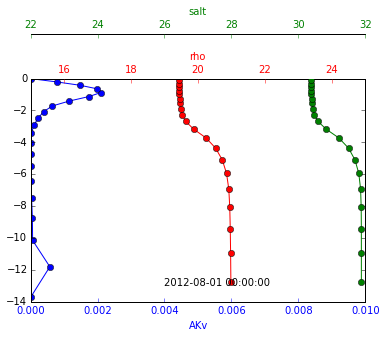

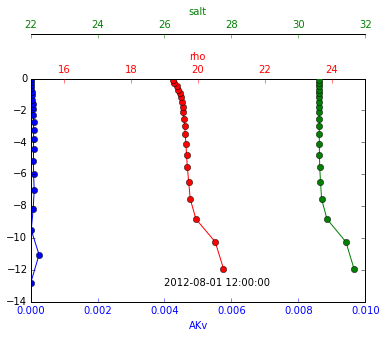

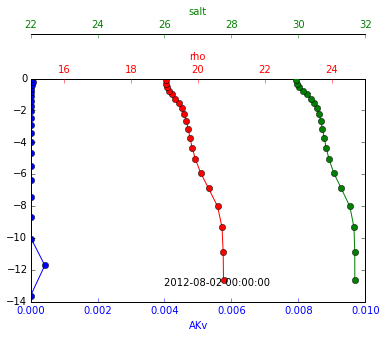

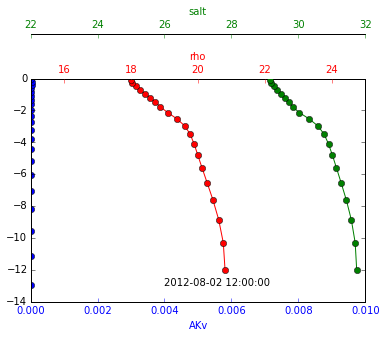

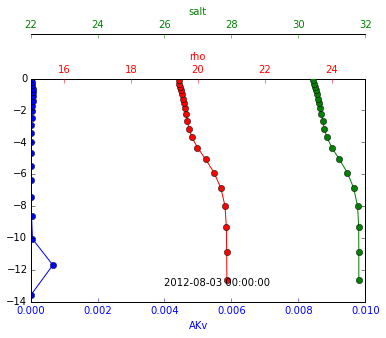

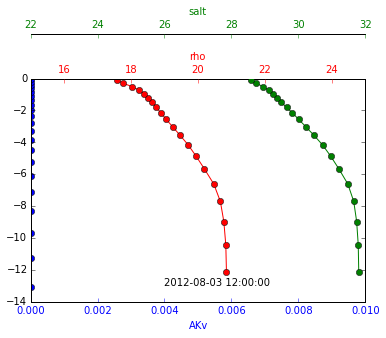

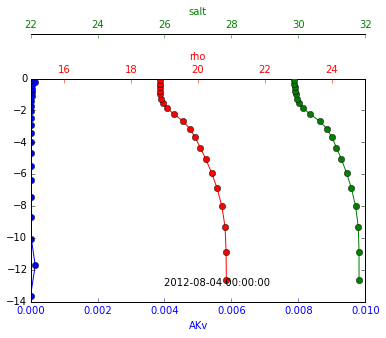

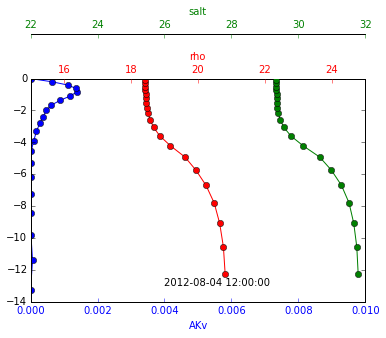

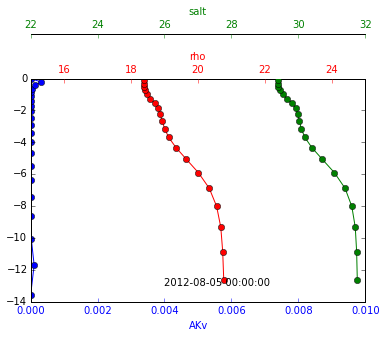

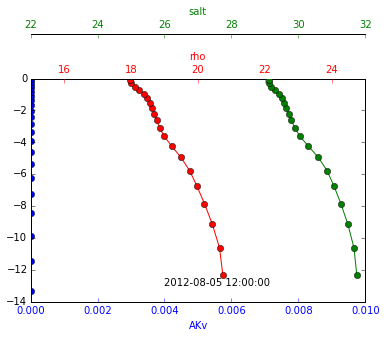

In [106]:
import pandas as pd
dates = pd.date_range(datetime(2012, 8, 1, 0), freq='12H', periods=10).tolist()

for date in dates:
    vplot(date, 12)